In [1]:
import os
import scipy as sp
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import constants
import subprocess

In [2]:
print("Current Working Directory " , os.getcwd())
#Uncomment the following line and write the directory you want to save the files
os.chdir("/Users/User/Desktop/Computational_physics/Molecular_dynamics/project4")
print("Current Working Directory " , os.getcwd())

Current Working Directory  /Users/User/Desktop/Computational_physics/Molecular_dynamics/MD
Current Working Directory  /Users/User/Desktop/Computational_physics/Molecular_dynamics/project4


In [3]:
Ts = np.linspace(1400,2000,15)
Kinetic_energies = []
Pot_energies = []
Temps = []

for i in range(len(Ts)):
    T = Ts[i]
    print(f'Progress: {int(100*i/len(Ts))}%')
    with open('in.mel.lammps', 'r') as f:
        lines = f.readlines()
    lines[17] = f'velocity all create {T} 3213112 dist gaussian\n'
    lines[-4] = f'fix mynvt1 all nvt temp {T} {T} 0.1\n'
    with open('in.mel.lammps', 'w') as f:
        f.writelines(lines)
    print('in.mel.lammps modified successfully')
    # run lmp -in in.lammps > result.txt in terminal
    subprocess.run('lmp_serial -in in.mel.lammps > result.txt', shell=True, check=True)
    print('run complete')
    t,knrg,pnrg,temp = np.loadtxt('energy.dat',dtype='float',unpack=True)
    Kinetic_energies.append(knrg[-1])
    Pot_energies.append(pnrg[-1])
    Temps.append(temp[-1])
    print('Quantities extracted')
    print('-----------------------------------------')
Kinetic_energies = np.array(Kinetic_energies)
Pot_energies = np.array(Pot_energies)
Temps = np.array(Temps)

Progress: 0%
in.mel.lammps modified successfully
run complete
Quantities extracted
-----------------------------------------
Progress: 6%
in.mel.lammps modified successfully
run complete
Quantities extracted
-----------------------------------------
Progress: 13%
in.mel.lammps modified successfully
run complete
Quantities extracted
-----------------------------------------
Progress: 20%
in.mel.lammps modified successfully
run complete
Quantities extracted
-----------------------------------------
Progress: 26%
in.mel.lammps modified successfully
run complete
Quantities extracted
-----------------------------------------
Progress: 33%
in.mel.lammps modified successfully
run complete
Quantities extracted
-----------------------------------------
Progress: 40%
in.mel.lammps modified successfully
run complete
Quantities extracted
-----------------------------------------
Progress: 46%
in.mel.lammps modified successfully
run complete
Quantities extracted
------------------------------------

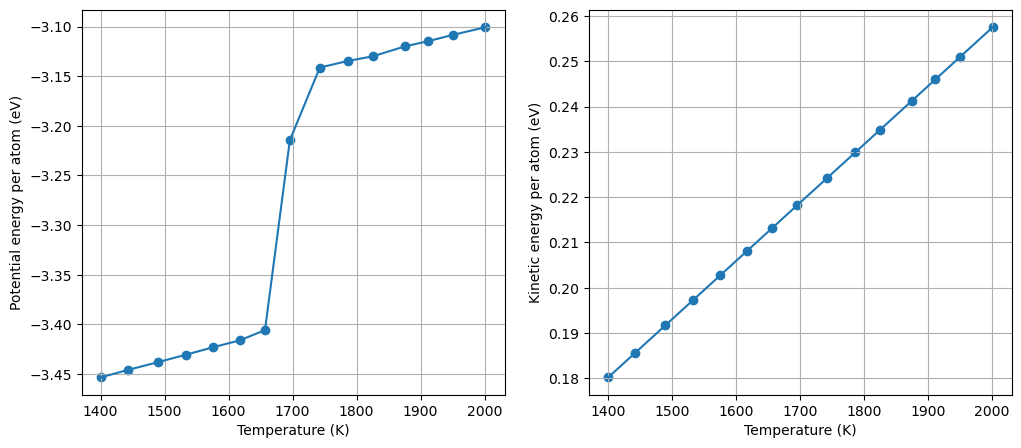

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].scatter(Temps , Pot_energies/216)
axes[0].plot(Temps , Pot_energies/216)
axes[0].grid()
axes[0].set_xlabel('Temperature (K)')
axes[0].set_ylabel('Potential energy per atom (eV)')

axes[1].scatter(Temps , Kinetic_energies/216)
axes[1].plot(Temps , Kinetic_energies/216)
axes[1].grid()
axes[1].set_xlabel('Temperature (K)')
axes[1].set_ylabel('Kinetic energy per atom (eV)')
plt.show()

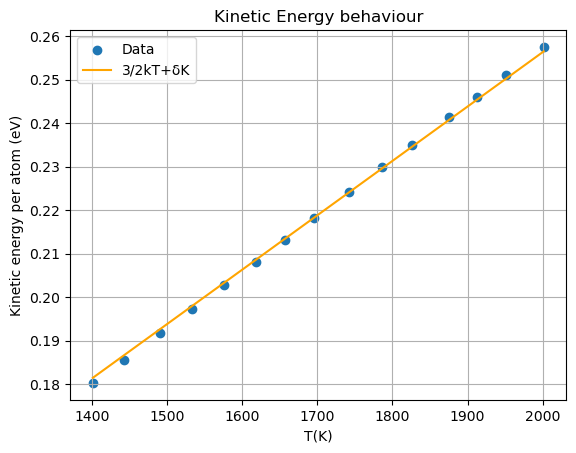

In [21]:
plt.scatter(Temps , Kinetic_energies/216,label = 'Data')
plt.plot(Temps , 3/2 * 1/40 * Temps/300+0.0063 , label = '3/2kT+δK', color = 'orange')
plt.grid()
plt.legend()
plt.xlabel('T(K)')
plt.ylabel('Kinetic energy per atom (eV)')
plt.title('Kinetic Energy behaviour')
plt.show()

## EOF